<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/RelatorioAutomaticoEmailFechamentoAcoes/blob/main/aula_1_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Report de mercado

### Desafio:

* Automação de um relatório de fechamento de mercado com o Python através da coleta de cotações históricas do Ibovespa e Dólar e do envio diário através de uma ferramenta de e-mail automaticamente.  

### Passo a passo:

*   **Passo 1** - Instalar e importar os módulos e bibliotecas.
   
   
*   **Passo 2** - Pegar as cotações históricas.
   
   
*   **Passo 3** - Tratar dados coletados.
   
   
*   **Passo 4** - Criar gráficos de performance.
   
   
*   **Passo 5** - Calcular retornos diários.
   
   
*   **Passo 6** - Configurar e enviar o e-mail.

# Dúvidas no meu INSTAGRAM @BRENNO.VAROS
   
-------------------

# Passo 1 - Instalar e importar os módulos e bibliotecas.

In [89]:
!pip install mplcyberpunk

In [90]:
!pip install yfinance

In [91]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Passo 2 - Pegar as cotações históricas

In [92]:
tickers = ["BTC-USD"]

In [93]:
dados_mercado = yf.download(tickers, period = "6mo")
#dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-09,68299.257812,68673.054688,68053.125000,68498.882812,68498.882812,21609650379
2024-03-10,68500.257812,70005.203125,68239.976562,69019.789062,69019.789062,35683977532
2024-03-11,69020.546875,72850.710938,67194.882812,72123.906250,72123.906250,65716656765
2024-03-12,72125.125000,72825.656250,68728.851562,71481.289062,71481.289062,62554434520
2024-03-13,71482.117188,73637.476562,71334.093750,73083.500000,73083.500000,48212536929
...,...,...,...,...,...,...
2024-09-05,57971.703125,58300.582031,55712.453125,56160.488281,56160.488281,31030280656
2024-09-06,56160.191406,56976.109375,52598.699219,53948.753906,53948.753906,49361693566
2024-09-07,53949.085938,54838.144531,53740.070312,54139.687500,54139.687500,19061486526


# Passo 3 - Tratar dados coletados.

In [94]:
dados_mercado = dados_mercado.dropna()

dados_mercado

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-09,68299.257812,68673.054688,68053.125000,68498.882812,68498.882812,21609650379
2024-03-10,68500.257812,70005.203125,68239.976562,69019.789062,69019.789062,35683977532
2024-03-11,69020.546875,72850.710938,67194.882812,72123.906250,72123.906250,65716656765
2024-03-12,72125.125000,72825.656250,68728.851562,71481.289062,71481.289062,62554434520
2024-03-13,71482.117188,73637.476562,71334.093750,73083.500000,73083.500000,48212536929
...,...,...,...,...,...,...
2024-09-05,57971.703125,58300.582031,55712.453125,56160.488281,56160.488281,31030280656
2024-09-06,56160.191406,56976.109375,52598.699219,53948.753906,53948.753906,49361693566
2024-09-07,53949.085938,54838.144531,53740.070312,54139.687500,54139.687500,19061486526


In [95]:
dados_mercado.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Passo 4 - Criar gráficos de performance.

In [96]:
plt.style.use("cyberpunk")

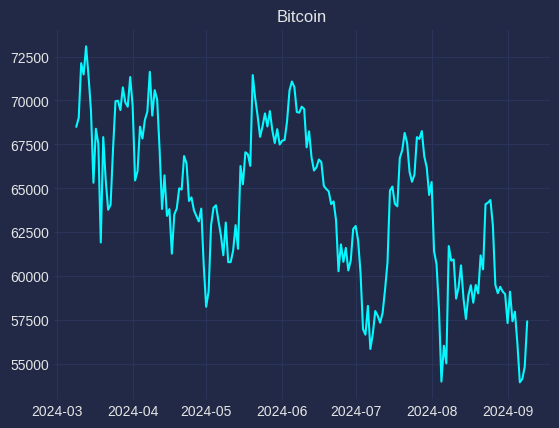

In [97]:
plt.plot(dados_mercado["Adj Close"])
plt.title("Bitcoin")

plt.savefig("bitcoin.png")

# Passo 5 - Calcular retornos diários.

In [98]:

fechamento_ajuste = dados_mercado['Adj Close']
retornos_diarios = fechamento_ajuste.pct_change()

retornos_diarios

,Adj Close
Date,
2024-03-09,NaN
2024-03-10,0.007605
2024-03-11,0.044974
2024-03-12,-0.008910
2024-03-13,0.022414
...,...
2024-09-05,-0.031240
2024-09-06,-0.039382
2024-09-07,0.003539


In [99]:
retorno_bitcoin= dados_mercado['Adj Close'].iloc[-1]
retorno_bitcoin

57422.703125

In [100]:
retorno_bitcoin = round(retorno_bitcoin, 2)
retorno_bitcoin

57422.7

# Passo 6 - Configurar e enviar o e-mail

In [103]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os

def enviar_relatorio(destinatario, assunto, corpo, caminho_relatorio):
    # Configurações do servidor SMTP (exemplo usando Gmail)
    smtp_host = 'smtp.gmail.com'
    smtp_port = 587
    remetente = 'satoshin968@gmail.com'
    senha = 'kjcd5588'  # Use uma senha de aplicativo (não a senha normal)

    # Criação da mensagem
    msg = MIMEMultipart()
    msg['From'] = remetente
    msg['To'] = destinatario
    msg['Subject'] = assunto

    # Corpo do e-mail
    msg.attach(MIMEText(corpo, 'plain'))

    # Anexo do relatório
    if caminho_relatorio:
        attachment = open(caminho_relatorio, 'rb')
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(caminho_relatorio)}')
        msg.attach(part)

    # Conexão com o servidor SMTP
    server = smtplib.SMTP(smtp_host, smtp_port)
    server.starttls()  # Segurança (TLS)
    server.login(remetente, senha)

    # Enviar e-mail
    texto = msg.as_string()
    server.sendmail(remetente, destinatario, texto)

    # Encerrar conexão
    server.quit()
    print(f"E-mail enviado para {destinatario}")

# Exemplo de uso
enviar_relatorio(
    destinatario="evento@varos.com.br",
    assunto='Relatório Automático',
    corpo='Segue em anexo o relatório.',
    caminho_relatorio='/content/bitcoin.png'  # Caminho para o arquivo no Colab
)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 98e67ed59e1d1-2dadc03700dsm7139100a91.21 - gsmtp')